# Table of Contents

1. [Data Overview and Cleaning](#overview_and_cleaning) <br>
2. [EDA](#EDA) <br>
    2.1 [Serving](#serving) <br>
    2.2 [Rally Length and Point Length](#rally_and_point_length)

## 1. Data Overview & Cleaning
<a id='overview_and_cleaning'></a>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = 'Data/cleaned_data.csv'

# Loading the cleaned data set I saved to a csv from the initial data collection and cleaning module
df = pd.read_csv(data, low_memory=False)

# Setting the amount of columns to display to 100 so I can see the entire dataframe
pd.set_option("display.max_columns", 100)
pd.get_option("display.max_columns")

# Setting the amount of rows to display at default to 100
pd.set_option('display.max_rows', 100)

In [3]:
# Creating a dataframe for all of Roger Federer's matches and points
federer = df[(df['player_1'] == 'Roger Federer') | (df['player_2'] == 'Roger Federer')].reset_index(drop=True)
federer.head()

,Unnamed: 0,match_id,match_year,slam,match_num,player_1,player_2,match_status,match_winner,event_type,round,court_name,player_1_nation,player_2_nation,elapsed_time,set_number,p1_games_won,p2_games_won,set_winner,game_number,game_winner,point_number,point_winner,point_server,serve_speed_kmh,rally,p1_score,p2_score,p1_momentum,p2_momentum,p1_points_won,p2_points_won,p1_ace,p2_ace,p1_shot_winner,p2_shot_winner,p1_double_fault,p2_double_fault,p1_unforced_error,p2_unforced_error,p1_net_point,p2_net_point,p1_net_point_won,p2_net_point_won,p1_break_point,p2_break_point,p1_break_point_won,p2_break_point_won,p1_first_serve_in,p2_first_serve_in,p1_first_serve_won,p2_first_serve_won,p1_second_serve_in,p2_second_serve_in,p1_second_serve_won,p2_second_serve_won,p1_forced_error,p2_forced_error,history,speed_mph,p1_break_point_missed,p2_break_point_missed,serve_indicator,serve_direction,winner_fh,winner_bh,serving_to,serve_number,winner_type,winner_shot_type,p1_distance_run,p2_distance_run,rallycount,serve_width,serve_depth,return_depth,point_time
0,6455,2011-frenchopen-1148,2011.0,frenchopen,1148.0,Feliciano Lopez,Roger Federer,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,SUI,00:00:00,1.0,0.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6456,2011-frenchopen-1148,2011.0,frenchopen,1148.0,Feliciano Lopez,Roger Federer,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,SUI,00:00:00,1.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,NaN,186.0,1.0,0,15,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21010.0,115.0,0.0,0.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00.000000000
2,6457,2011-frenchopen-1148,2011.0,frenchopen,1148.0,Feliciano Lopez,Roger Federer,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,SUI,00:00:22,1.0,0.0,0.0,NaN,1.0,NaN,2.0,NaN,NaN,196.0,1.0,0,30,0.0,7.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23000.0,121.0,0.0,0.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:22.000000000
3,6458,2011-frenchopen-1148,2011.0,frenchopen,1148.0,Feliciano Lopez,Roger Federer,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,SUI,00:00:38,1.0,0.0,0.0,NaN,1.0,NaN,3.0,NaN,NaN,151.0,2.0,15,30,1.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22020.0,93.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:16.000000000
4,6459,2011-frenchopen-1148,2011.0,frenchopen,1148.0,Feliciano Lopez,Roger Federer,NaN,NaN,event_MS,round_1,Court Philippe Chatrier,ESP,SUI,00:01:11,1.0,0.0,0.0,NaN,1.0,NaN,4.0,NaN,NaN,197.0,1.0,15,40,1.0,9.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23000.0,122.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:33.000000000


In [4]:
federer.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
100 * federer.isnull().sum() / len(federer)

match_id                   0.000000
match_year                 0.000000
slam                       0.000000
match_num                  0.000000
player_1                   0.000000
player_2                   0.000000
match_status             100.000000
match_winner             100.000000
event_type                88.112532
round                     88.112532
court_name                88.112532
player_1_nation           88.112532
player_2_nation           88.112532
elapsed_time               0.000000
set_number                 0.000000
p1_games_won               0.000000
p2_games_won               0.000000
set_winner               100.000000
game_number                0.000000
game_winner              100.000000
point_number               0.138035
point_winner             100.000000
point_server             100.000000
serve_speed_kmh            0.000000
rally                     88.112532
p1_score                   0.000000
p2_score                   0.000000
p1_momentum               46

In [6]:
federer.drop(['match_status', 'event_type', 'player_1_nation', 'player_2_nation'], axis=1, inplace=True)

In [7]:
# Swapping all the values for player 1 stats columns with player 2 stats columns when Roger Federer is player 1.

for column in federer.columns:
    if column[:2] == 'p1':
        fed_p1 = (federer['player_1'] == 'Roger Federer')
        p2 = 'p2' + column[2:]
        federer.loc[fed_p1, [column, p2]] = federer.loc[fed_p1, [p2, column]].values

In [8]:
# Switching Roger Federer to player 2 when he is listed as player 1

fed_p1 = (federer['player_1'] == 'Roger Federer')

federer.loc[fed_p1, ['player_1', 'player_2']] = federer.loc[fed_p1, ['player_2', 'player_1']].values

In [9]:
# Checking to make sure there are no longer any entries where Roger Federer is player 1
len(federer[federer['player_1'] == 'Roger Federer'])

0

In [10]:
fed_by_year = federer.groupby('match_year')

fed_by_slam = federer.groupby('slam')

## 2. EDA
<a id='EDA'></a>

### Points per year

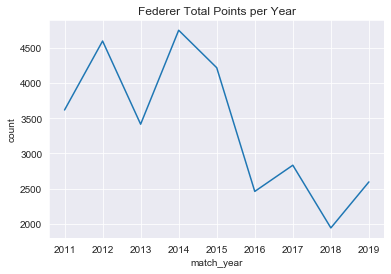

,match_year,count
0,2011.0,3617
1,2012.0,4596
2,2013.0,3415
3,2014.0,4749
4,2015.0,4217
5,2016.0,2461
6,2017.0,2833
7,2018.0,1943
8,2019.0,2596


In [11]:
points_per_year = federer.groupby(['match_year']).match_id.count().\
reset_index().rename(columns={'match_id': 'count'})

sns.lineplot(x='match_year', y='count', data=points_per_year)
plt.title('Federer Total Points per Year')
plt.show()

points_per_year

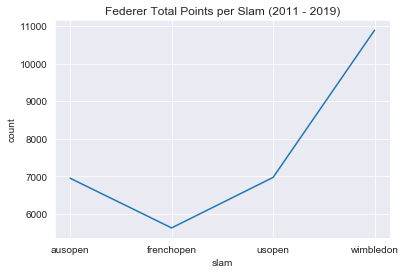

,slam,count
0,ausopen,6947
1,frenchopen,5625
2,usopen,6969
3,wimbledon,10886


In [12]:
points_per_slam = federer.groupby(['slam']).match_id.count().\
reset_index().rename(columns={'match_id': 'count'})

sns.lineplot(x='slam', y='count', data=points_per_slam)
plt.title('Federer Total Points per Slam (2011 - 2019)')
plt.show()

points_per_slam

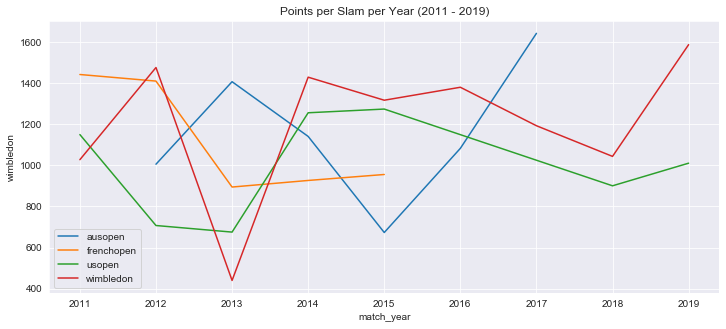

slam,ausopen,frenchopen,usopen,wimbledon
match_year,,,,
2011.0,NaN,1441.0,1149.0,1027.0
2012.0,1005.0,1409.0,707.0,1475.0
2013.0,1406.0,894.0,675.0,440.0
2014.0,1140.0,926.0,1255.0,1428.0
2015.0,673.0,955.0,1273.0,1316.0
2016.0,1082.0,NaN,NaN,1379.0
2017.0,1641.0,NaN,NaN,1192.0
2018.0,NaN,NaN,900.0,1043.0
2019.0,NaN,NaN,1010.0,1586.0


In [13]:
points_per_slam_per_year = federer.groupby(['match_year', 'slam']).match_id.count().reset_index()

points_per_slam_per_year = pd.pivot(points_per_slam_per_year, index='match_year', columns='slam', values='match_id')

plt.figure(figsize=(12, 5))
for column in points_per_slam_per_year.columns:
    
    sns.lineplot(x=points_per_slam_per_year.index, y=column, data=points_per_slam_per_year, label=column)
plt.title('Points per Slam per Year (2011 - 2019)')
plt.show()

points_per_slam_per_year

## 2.1 Serving
<a id='serving'></a>

### Aces by Year

In [14]:
fed_serving = federer[federer['serve_indicator'] == 2]

avg_ace_by_year = fed_serving.groupby('match_year').p2_ace.mean().reset_index()

avg_ace_by_year

,match_year,p2_ace
0,2011.0,0.060879
1,2012.0,0.038906
2,2013.0,0.046847
3,2014.0,0.082019
4,2015.0,0.084977
5,2016.0,0.032749
6,2017.0,0.074074
7,2018.0,0.054795
8,2019.0,0.055783


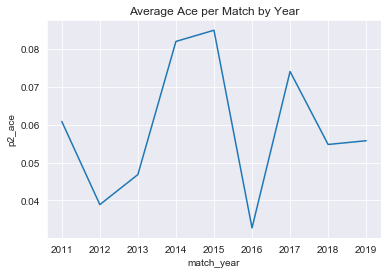

In [15]:
sns.lineplot(x='match_year', y='p2_ace', data=avg_ace_by_year)
plt.title('Average Ace per Match by Year')
plt.show()

### Serve Width by Year

In [36]:
serve_width_per_year = fed_serving.groupby(['match_year', 'serve_width']).match_id.count().\
reset_index().rename(columns={'match_id': 'count'})

serve_width_per_year = pd.pivot(serve_width_per_year, index='match_year', columns='serve_width',
                               values='count')

sw_pct_per_year = pd.DataFrame()


for column in serve_width_per_year.columns:
    sw_pct_per_year[column] = serve_width_per_year.apply(lambda x: round(x[column] / x.sum(), 2), axis=1)
    
sw_pct_per_year.reset_index(inplace=True)

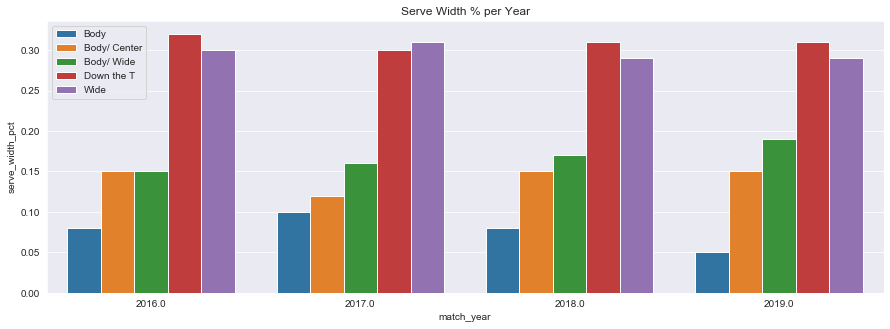

In [43]:
sw_pct_year_melt = pd.melt(sw_pct_per_year, id_vars='match_year', 
                           value_vars=[column for column in sw_pct_per_year.columns][1:], value_name='serve_width_pct',
                          var_name='serve_width')
plt.figure(figsize=(15, 5))
sns.barplot(x='match_year', y='serve_width_pct', data=sw_pct_year_melt, hue='serve_width')
plt.legend()
plt.title('Serve Width % per Year')
plt.show()

### Aces by Slam

In [24]:
aces_by_slam = fed_serving.groupby('slam').p2_ace.mean().reset_index()
aces_by_slam

,slam,p2_ace
0,ausopen,0.061411
1,frenchopen,0.049926
2,usopen,0.053623
3,wimbledon,0.068606


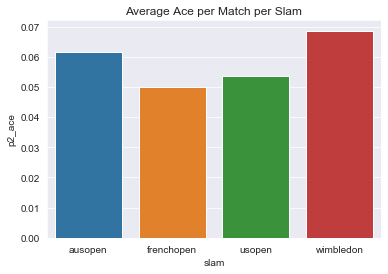

In [46]:
sns.barplot(x='slam', y='p2_ace', data=aces_by_slam)
plt.title('Average Ace per Match per Slam')
plt.show()

In [31]:
serve_width_per_slam = fed_serving.groupby(['slam', 'serve_width']).match_id.count().reset_index().rename(
    columns={'match_id': 'count'})

serve_width_per_slam = pd.pivot(serve_width_per_slam, index='slam', columns='serve_width', values='count')

sw_pct_per_slam = pd.DataFrame()

for column in serve_width_per_slam.columns:
    sw_pct_per_slam[column] = serve_width_per_slam.apply(lambda x: round(x[column] / x.sum(), 2), axis=1)
    
sw_pct_per_slam.reset_index(inplace=True)

In [34]:
sw_pct_slam_melt = pd.melt(sw_pct_per_slam, id_vars='slam', 
        value_vars=[column for column in sw_pct_per_slam.columns[1:]], value_name='serve_width_pct',
       var_name='serve_width')

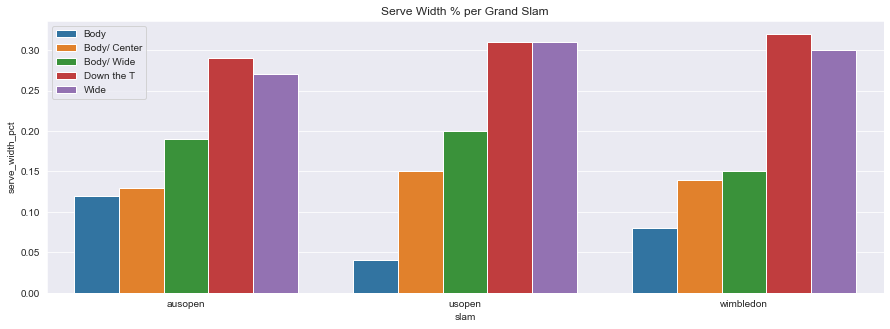

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x='slam', y='serve_width_pct', data=sw_pct_slam_melt, hue='serve_width')
plt.legend()
plt.title('Serve Width % per Grand Slam')
plt.show()

### Distribution of Serve Speed

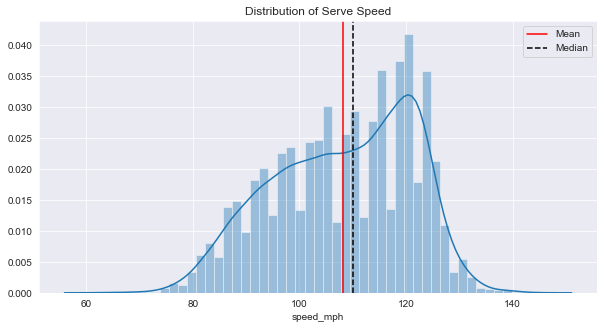

In [73]:
plt.figure(figsize=(10, 5))
sns.distplot(fed_serving[fed_serving['speed_mph'] > 0]['speed_mph'])

plt.axvline(np.mean(fed_serving_array), color='red', label='Mean')
plt.axvline(np.median(fed_serving_array), color='black', ls='--', label='Median')

plt.legend()
plt.title('Distribution of Serve Speed')
plt.show()

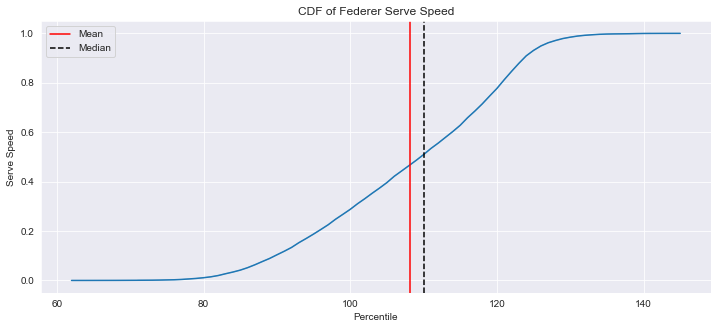

In [74]:
fed_serving_array = np.array(fed_serving[fed_serving['speed_mph'] > 0]['speed_mph'])
fed_serving_array = np.sort(fed_serving_array)

fed_serving_percentiles = np.arange(1, len(fed_serving_array)+1) / len(fed_serving_array)

plt.figure(figsize=(12, 5))
sns.lineplot(fed_serving_array, fed_serving_percentiles)

plt.axvline(np.mean(fed_serving_array), color='red', label='Mean')
plt.axvline(np.median(fed_serving_array), color='black', ls='--', label='Median')

plt.xlabel('Percentile')
plt.ylabel('Serve Speed')
plt.legend()
plt.title('CDF of Federer Serve Speed')

plt.show()

### Serve Speed per Year

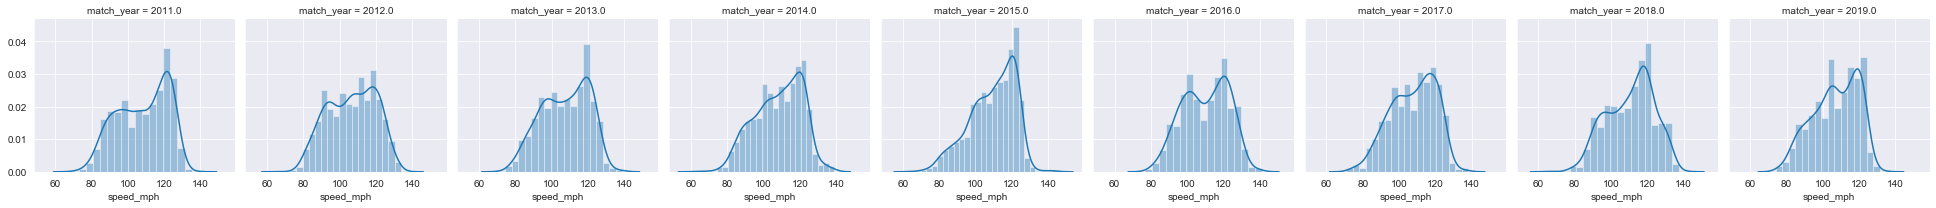

In [83]:
g = sns.FacetGrid(data=fed_serving[fed_serving['speed_mph'] >0 ], col='match_year')

g.map(sns.distplot, 'speed_mph')
plt.show()

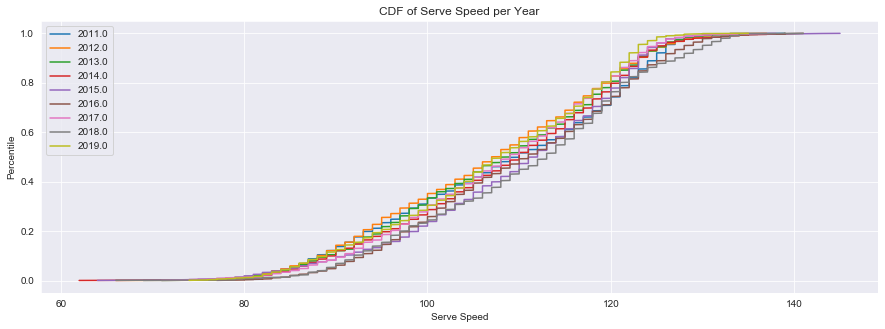

In [86]:
plt.figure(figsize=(15, 5))
for x in fed_serving['match_year'].unique():
    fed_year_serve_speed = np.array(fed_serving[(fed_serving['speed_mph'] > 0) & 
                                               (fed_serving['match_year'] == x)]['speed_mph'])
    fed_year_serve_speed = np.sort(fed_year_serve_speed)

    fed_year_serve_speed_y = np.arange(1, len(fed_year_serve_speed) + 1) / len(fed_year_serve_speed)
    
    plt.plot(fed_year_serve_speed, fed_year_serve_speed_y, label=x)
    
plt.xlabel('Serve Speed')
plt.ylabel('Percentile')
plt.legend()
plt.title('CDF of Serve Speed per Year')
plt.show()

### Serve Speed by Slam

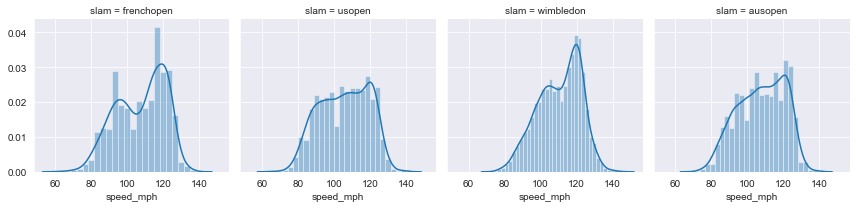

In [87]:
g = sns.FacetGrid(data=fed_serving[fed_serving['speed_mph'] > 0], col='slam')

g.map(sns.distplot, 'speed_mph')

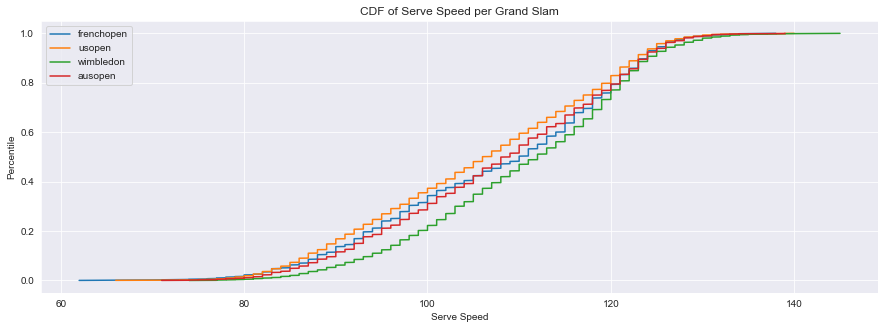

In [90]:
plt.figure(figsize=(15, 5))
for x in fed_serving['slam'].unique():
    fed_serve_speed_slam = np.array(fed_serving[(fed_serving['speed_mph'] > 0) &
                                               (fed_serving['slam'] == x)]['speed_mph'])
    fed_serve_speed_slam = np.sort(fed_serve_speed_slam)
    
    fed_serve_speed_slam_y = np.arange(1, len(fed_serve_speed_slam) + 1) / len(fed_serve_speed_slam)
    
    plt.plot(fed_serve_speed_slam, fed_serve_speed_slam_y, label=x)

plt.xlabel('Serve Speed')
plt.ylabel('Percentile')
plt.legend()
plt.title('CDF of Serve Speed per Grand Slam')
plt.show()

### Breakpoints against by Year

In [109]:
bp_against_by_year = fed_serving.groupby('match_year')['p1_break_point'].mean().reset_index()

bp_against_by_year

,match_year,p1_break_point
0,2011.0,0.027057
1,2012.0,0.020949
2,2013.0,0.028228
3,2014.0,0.034700
4,2015.0,0.024785
5,2016.0,0.012947
6,2017.0,0.022513
7,2018.0,0.027397
8,2019.0,0.028712


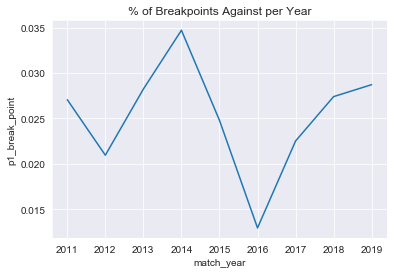

In [111]:
sns.lineplot(x='match_year', y='p1_break_point', data=bp_against_by_year)
plt.title('% of Breakpoints Against per Year')
plt.show()

### Breakpoints against by Slam

In [112]:
bp_against_by_slam = fed_serving.groupby('slam')['p1_break_point'].mean().reset_index()

bp_against_by_slam

,slam,p1_break_point
0,ausopen,0.026572
1,frenchopen,0.025148
2,usopen,0.031884
3,wimbledon,0.021066


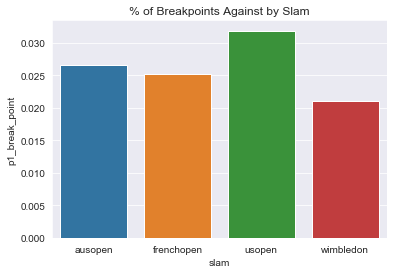

In [114]:
sns.barplot(x='slam', y='p1_break_point', data=bp_against_by_slam)
plt.title('% of Breakpoints Against by Slam')
plt.show()

### Double Faults Saved per Year

In [123]:
fed_bp_against = fed_serving[fed_serving['p1_break_point'] == 1]

bp_saved_per_year = fed_bp_against.groupby('match_year')['p1_break_point_won'].mean().reset_index().rename(
    columns={'p1_break_point_won': 'bp_saved'})

bp_saved_per_year['bp_saved'] = bp_saved_per_year['bp_saved'].apply(lambda x: 1 - x)

bp_saved_per_year

,match_year,bp_saved
0,2011.0,0.770833
1,2012.0,0.387755
2,2013.0,0.872340
3,2014.0,1.000000
4,2015.0,1.000000
5,2016.0,0.529412
6,2017.0,0.612903
7,2018.0,0.857143
8,2019.0,0.628571


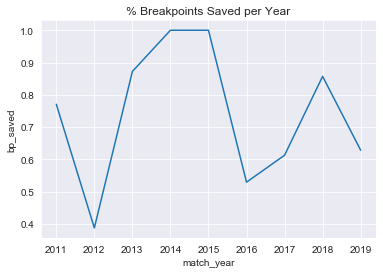

In [124]:
sns.lineplot(x='match_year', y='bp_saved', data=bp_saved_per_year)
plt.title('% Breakpoints Saved per Year')
plt.show()

### Breakpoints Saved per Slam

In [127]:
fed_bp_against = fed_serving[fed_serving['p1_break_point'] == 1]

bp_saved_per_slam = fed_bp_against.groupby('slam')['p1_break_point_won'].mean().reset_index().rename(
    columns={'p1_break_point_won': 'bp_saved'})

bp_saved_per_slam['bp_saved'] = bp_saved_per_slam['bp_saved'].apply(lambda x: 1 - x)

bp_saved_per_slam

,slam,bp_saved
0,ausopen,0.755556
1,frenchopen,0.794118
2,usopen,0.709091
3,wimbledon,0.858407


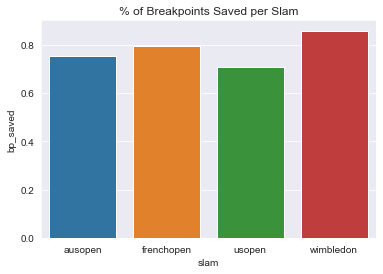

In [128]:
sns.barplot(x='slam', y='bp_saved', data=bp_saved_per_slam)
plt.title('% of Breakpoints Saved per Slam')
plt.show()

### Double Faults per Year

In [116]:
double_faults_per_year = fed_serving.groupby('match_year')['p2_double_fault'].mean().reset_index()

double_faults_per_year

,match_year,p2_double_fault
0,2011.0,0.007328
1,2012.0,0.003848
2,2013.0,0.010210
3,2014.0,0.016674
4,2015.0,0.020233
5,2016.0,0.003808
6,2017.0,0.010893
7,2018.0,0.016634
8,2019.0,0.013946


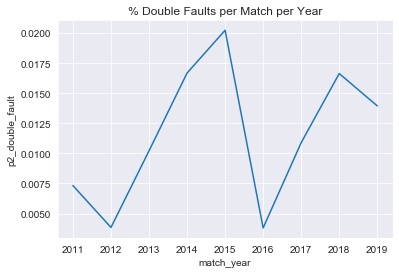

In [117]:
sns.lineplot(x='match_year', y='p2_double_fault', data=double_faults_per_year)
plt.title('% Double Faults per Match per Year')
plt.show()

### Double Faults Per Slam

In [118]:
double_faults_per_slam = fed_serving.groupby('slam')['p2_double_fault'].mean().reset_index()

double_faults_per_slam

,slam,p2_double_fault
0,ausopen,0.013286
1,frenchopen,0.008506
2,usopen,0.015942
3,wimbledon,0.008762


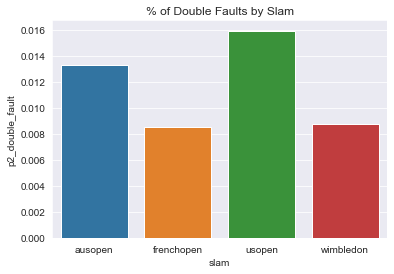

In [119]:
sns.barplot(x='slam', y='p2_double_fault', data=double_faults_per_slam)
plt.title('% of Double Faults by Slam')
plt.show()

## 2.2 Rally Length + Point Length
<a id='rally_and_point_length'></a>